This is Slone's code for their part of the Spotify analysis. 

In [3]:
#dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


#import spotify keys
from config import client_id
from config import client_secret

In [4]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [5]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [6]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
global_df_full = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = global_df_full[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df

global_songs_df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,1,spotify:track:4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,Columbia,1,1,9,60420855
1,2,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,Rimas Entertainment LLC,2,4,4,39026161
2,3,spotify:track:3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,Rimas Entertainment LLC,3,3,4,37623538
3,4,spotify:track:75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Rhino,4,-1,1,32763806
4,5,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,Rimas Entertainment LLC,5,9,4,31126704
...,...,...,...,...,...,...,...,...,...
195,196,spotify:track:1WCEAGGRD066z2Q89ObXTq,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,Parlophone UK,178,195,4,5568564
196,197,spotify:track:2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,Elektra (NEK),1,-1,148,5556591
197,198,spotify:track:5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,Olivia Rodrigo PS,11,197,48,5552673
198,199,spotify:track:6lX6l7OuA3qrnIRfdsr0dw,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,WEA Latina,48,168,28,5552315


In [7]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [8]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
 #fill in track info for each audio feature / empty list. note, this code takes approx. 5 minutes to run
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"]) 
    time.sleep(1)
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])    

In [10]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [11]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [12]:
full_track_data

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1WCEAGGRD066z2Q89ObXTq,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,178,195,4,5568564,0.601,0.713,...,0.0449,0.0282,0.000000,0.1580,0.464,122.872,2.83,4,https://api.spotify.com/v1/tracks/1WCEAGGRD066...,https://api.spotify.com/v1/audio-analysis/1WCE...
196,197,2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,1,-1,148,5556591,0.824,0.587,...,0.0937,0.6900,0.000105,0.1490,0.514,98.029,3.49,4,https://api.spotify.com/v1/tracks/2N8m6CYs74qQ...,https://api.spotify.com/v1/audio-analysis/2N8m...
197,198,5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,11,197,48,5552673,0.369,0.272,...,0.0364,0.8660,0.000000,0.1470,0.218,172.929,2.54,4,https://api.spotify.com/v1/tracks/5JCoSi02qi3j...,https://api.spotify.com/v1/audio-analysis/5JCo...
198,199,6lX6l7OuA3qrnIRfdsr0dw,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,48,168,28,5552315,0.787,0.700,...,0.0768,0.5680,0.000510,0.6630,0.791,90.020,3.89,4,https://api.spotify.com/v1/tracks/6lX6l7OuA3qr...,https://api.spotify.com/v1/audio-analysis/6lX6...


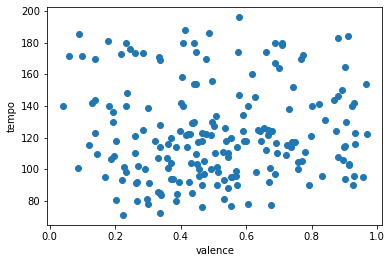

In [13]:
#plot valence and tempo to see what they look like
plt.figure()
plt.scatter(valence,tempo)
plt.xlabel('valence')
plt.ylabel('tempo')
plt.show()

In [14]:
#look at the statistical relationship between valence and tempo
valtemp_regress = linregress(valence, tempo)
m=valtemp_regress[0]
b=valtemp_regress[1]

valtemp_regress

LinregressResult(slope=2.380290183190122, intercept=121.53705467840044, rvalue=0.01862763234912518, pvalue=0.7934710114746655, stderr=9.079549316959119, intercept_stderr=5.13336038050127)

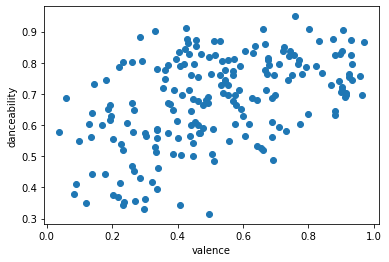

In [15]:
#plot valence and danceability to see what they look like
plt.figure()
plt.scatter(valence,danceability)
plt.xlabel('valence')
plt.ylabel('danceability')
plt.show()

In [16]:
#look at the statistical relationship between valence and danceability
valdance_regress = linregress(valence, danceability)
m=valdance_regress[0]
b=valdance_regress[1]

valdance_regress

LinregressResult(slope=0.30148020144614585, intercept=0.5220150961199509, rvalue=0.4831430731439223, pvalue=4.294438321338373e-13, stderr=0.038826401269388224, intercept_stderr=0.021951520173082082)

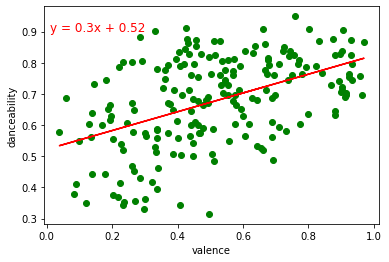

In [17]:
#plot valence and danceability with best fit line, because there is a significant p value 
xvalues = full_track_data['valence']
yvalues = full_track_data['danceability']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.01,0.9),fontsize=12,color="red")

#plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvalues,yvalues, c='green')

plt.plot(xvalues, regress_values, "r-")
plt.xlabel('valence')
plt.ylabel('danceability')

#save the plot
plt.savefig('dance_valance_plot3', dpi=300, bbox_inches='tight')

#show plot
plt.show()


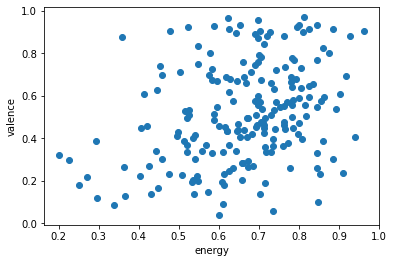

In [18]:
#plot valence and energy variables to see what they look like
plt.figure()
plt.scatter(energy,valence)
plt.xlabel('energy')
plt.ylabel('valence')
plt.show()

In [22]:
#look at the statistical relationship between valence and energy
enval_regress = linregress(energy, valence)
m=enval_regress[0]
b=enval_regress[1]

enval_regress

LinregressResult(slope=0.5183406029767171, intercept=0.1728731867595239, rvalue=0.32972015364178214, pvalue=1.8631912290917494e-06, stderr=0.10547398316258119, intercept_stderr=0.07143372700636418)

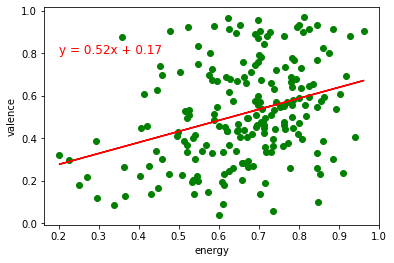

In [24]:
#plot valence and energy variables with best fit line, because there is a significant p value
#include y=mx+b on scatterplot
xvalues = full_track_data['energy']
yvalues = full_track_data['valence']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.2,0.8),fontsize=12,color="red")

#plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(xvalues,yvalues, c='green')

plt.plot(xvalues, regress_values, "r-")
plt.xlabel('energy')
plt.ylabel('valence')
#save the plot
plt.savefig('valence_energy_plot4', dpi=300, bbox_inches='tight')

#show plot
plt.show()


In [45]:
#calculate the mean and standard deviation of energy variable
energy_mean = np.mean(energy)
energy_mean

energy_std = np.std(energy)
energy_std

#find the number of songs above 50%
energy_loc = np.where(np.array(energy) > .5)
energy_50 = np.array(energy)[energy_loc]
len(energy_50)

174

In [48]:
#calculate the mean and standard deviation of valiance variable
valence_mean = np.mean(valence)
valence_mean

valence_std = np.std(valence)
valence_std

#find the number of songs above 50%
    #np.where gives us a list of bools where this condition is or isn't met (t/f)
valence_location = np.where(np.array(valence) > .5)
    #this line of code fills in the locations where the condition is true 
valence_50 = np.array(valence)[valence_location]
len(valence_50), valence_mean, valence_std

(98, 0.515473, 0.23224501150939714)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe8987c6910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8987df430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe8987d3a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8987dfb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8987dfee0>],
 'means': []}

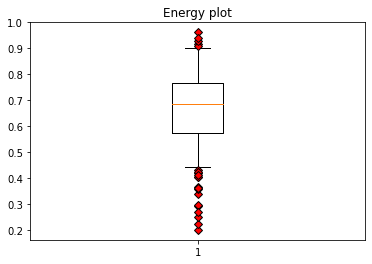

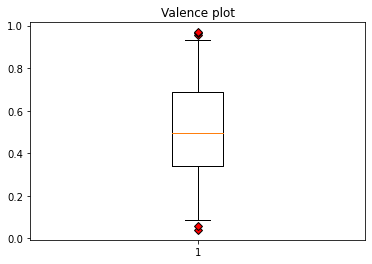

In [28]:
#create box and whisker plot for energy and valence
red_diamond = dict(markerfacecolor='r', marker='D')
boxplot1, ax1 = plt.subplots()
ax1.set_title('Energy plot')
ax1.boxplot(energy, whis=0.75, flierprops=red_diamond)

red_diamond = dict(markerfacecolor='r', marker='D')
boxplot1, ax1 = plt.subplots()
ax1.set_title('Valence plot')
ax1.boxplot(valence, whis=0.75, flierprops=red_diamond)

<Figure size 720x540 with 0 Axes>

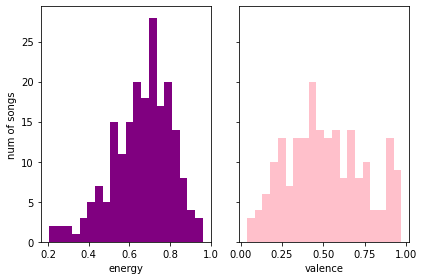

In [16]:
#create histograms for energy and valence variables

n_bins = 20

plt.figure(figsize=(8, 6), dpi=90)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(energy, bins=n_bins, color='purple')
axs[1].hist(valence, bins=n_bins, color='pink')

axs[0].set_xlabel('energy')
axs[0].set_ylabel('num of songs')
axs[1].set_xlabel('valence')
#save the plot
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

#show plot
plt.show()

Summary of the energy histogram. For the global top 200 songs from the first week of june, the songs are on average very high energy, with a mean energy score of 0.66 and standard deviation of 0.15 and with 174 songs out of 200 above the 50% energy level. 

Summary of the valence histogram. This variable is not well-defined by spotify, which may explain why the mean is .51, and its standard deviation is half the mean at .23, making the distribution very wide. 

For future directions I'd want to look at genre and valence. I will need to pull from another API to do so
    (https://developer.spotify.com/console/get-available-genre-seeds/)
    
I would also want to look at Apple Music's API and compare their audio features to Spotify's.
    Particularly, I would like to see how their valence variable compares to Spotify's. 